In [2]:
import tensorflow as tf            # deep learning library. Tensors are just multi-dimensional arrays
import tensorflow.keras as keras

In [33]:
mnist = tf.keras.datasets.mnist   # mnist is a dataset of 28x28 images of handwritten digits and their labels 0-9
(X_train , y_train) ,( X_test, y_test) = mnist.load_data()  # unpacks images to X_train_full/X_test and labels to y_train_full/y_test

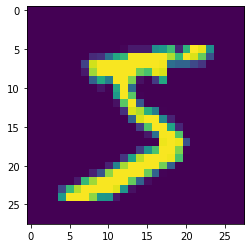

In [34]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])   # index 0th digit of  X_train_full data set in image form
plt.show()

In [35]:
print(X_train[0])  # index 0th digit of  X_train_full data set in binary form

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [36]:
y_train[0]   #  How about the value for y_train with the same index?

5

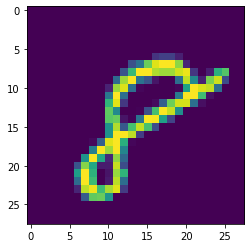

In [37]:
plt.imshow(X_train[59999]) # list of digit is from 0 to 59999

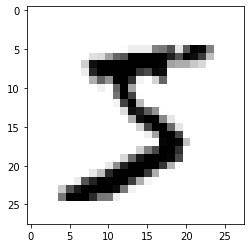

In [38]:
plt.imshow(X_train[0], cmap=plt.cm.binary) #  in black & white  no colour 

In [39]:
X_train = tf.keras.utils.normalize(X_train_full, axis=1)  # scales data between 0 and 1
X_test = tf.keras.utils.normalize(X_test, axis=1)  # scales data between 0 and 1

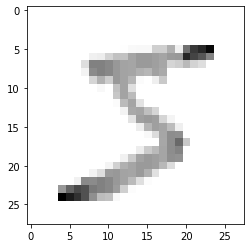

In [40]:
plt.imshow(X_train[0], cmap=plt.cm.binary) # Image looks lighter after scalling

In [41]:
X_train.shape

(60000, 28, 28)

In [28]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.layers

In [31]:
model.layers[0].name

'flatten_1'

In [42]:
model.compile(loss="sparse_categorical_crossentropy", # how will we calculate our "error." Neural network aims to minimize loss.
optimizer="sgd",
metrics=["accuracy"]) # what to track

In [46]:
history = model.fit(X_train, y_train, epochs=30 )

Epoch 1/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0527 - accuracy: 0.9864
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0506 - accuracy: 0.9865
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0488 - accuracy: 0.9878
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0470 - accuracy: 0.9880
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0453 - accuracy: 0.9886
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0437 - accuracy: 0.9890
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0422 - accuracy: 0.9898
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0407 - accuracy: 0.9898
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0392 - accuracy: 0.9905
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.037

In [48]:
val_loss, val_acc = model.evaluate(X_test, y_test) # evaluate the out of sample data with model

313/313 [==============================] - 1s 2ms/step - loss: 0.0762 - accuracy: 0.9779


In [ ]:
#It's going to be very likely your accuracy out of sample is a bit worse, same with loss. 
#In fact, it should be a red flag if it's identical, or better.

In [49]:
history.history

{'accuracy': [0.9863666892051697,
  0.986549973487854,
  0.987766683101654,
  0.988016664981842,
  0.9886000156402588,
  0.9890166521072388,
  0.9898499846458435,
  0.9898499846458435,
  0.9905499815940857,
  0.9907833337783813,
  0.991516649723053,
  0.9917500019073486,
  0.9921500086784363,
  0.9926499724388123,
  0.9928500056266785,
  0.9930499792098999,
  0.9935166835784912,
  0.9938833117485046,
  0.9940666556358337,
  0.994533360004425,
  0.9945499897003174,
  0.9953833222389221,
  0.9953500032424927,
  0.9953333139419556,
  0.9960333108901978,
  0.995983362197876,
  0.9961333274841309,
  0.9964166879653931,
  0.9966333508491516,
  0.996649980545044],
 'loss': [0.052710067480802536,
  0.05064309015870094,
  0.04880114644765854,
  0.04702089726924896,
  0.04526318609714508,
  0.04367563873529434,
  0.042167529463768005,
  0.04068208113312721,
  0.03920836001634598,
  0.03788622468709946,
  0.03656064346432686,
  0.03519672527909279,
  0.03391391038894653,
  0.03281505033373833,
  

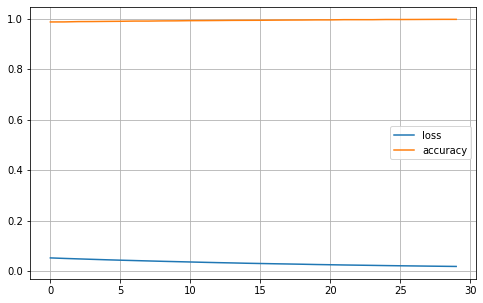

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
#plt.gca().set_xlim(0, 1)
plt.show()

In [54]:
model.save('epic_num_reader.model') # with your model, you can save it super easily:

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [55]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [57]:
predictions = new_model.predict(X_test)
print(predictions)

[[5.3505161e-10 2.7014704e-09 7.0279896e-07 ... 9.9980897e-01
  1.9060624e-09 1.0752367e-06]
 [1.0267279e-07 9.0718066e-04 9.9909055e-01 ... 1.9105351e-10
  2.6382830e-07 1.2019896e-13]
 [3.7222016e-08 9.9982423e-01 7.4100644e-05 ... 4.6079385e-05
  4.2570889e-05 1.6038214e-07]
 ...
 [6.5737131e-11 1.0571406e-08 3.3303874e-10 ... 1.1651358e-06
  5.6192579e-07 2.7736734e-05]
 [3.8430240e-08 5.6884787e-08 4.0621267e-11 ... 1.0192536e-09
  1.8594111e-04 3.3569050e-11]
 [4.0197861e-07 2.1970731e-10 1.4017338e-08 ... 8.9441388e-12
  4.0742161e-09 9.2937345e-11]]


In [62]:
#That sure doesn't start off as helpful, 
# but recall these are probability distributions. We can get the actual number pretty simply:
import numpy as np

print(np.argmax(predictions[0]))  # Predictions of X_test of 0th index is 7

7


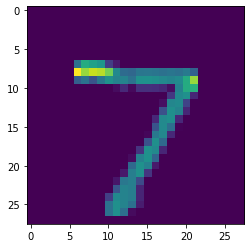

In [63]:
plt.imshow(X_test[0])
plt.show()